<a href="https://colab.research.google.com/github/QuangLe102/AI/blob/main/CNN_CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import thư viện

In [1]:
import cv2
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar100
from keras.models import Sequential
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Dropout,Flatten, Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam, RMSprop,SGD

# Load và xử lý data

In [3]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_pre = x_test
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

# Tạo model

In [4]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

#ANN
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

# Compile và train

In [5]:
opt= SGD(lr=0.01,momentum = 0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs= 50,batch_size=64,validation_data=(x_test,y_test),verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
782/782 [==============================] - 120s 153ms/step - loss: 4.4870 - accuracy: 0.0212 - val_loss: 4.3581 - val_accuracy: 0.0321
Epoch 2/50
782/782 [==============================] - 105s 134ms/step - loss: 3.9160 - accuracy: 0.0909 - val_loss: 3.6213 - val_accuracy: 0.1368
Epoch 3/50
782/782 [==============================] - 102s 131ms/step - loss: 3.3611 - accuracy: 0.1812 - val_loss: 3.2150 - val_accuracy: 0.2122
Epoch 4/50
782/782 [==============================] - 102s 130ms/step - loss: 3.0490 - accuracy: 0.2346 - val_loss: 3.0039 - val_accuracy: 0.2507
Epoch 5/50
782/782 [==============================] - 101s 129ms/step - loss: 2.8196 - accuracy: 0.2837 - val_loss: 2.8728 - val_accuracy: 0.2703
Epoch 6/50
782/782 [==============================] - 101s 129ms/step - loss: 2.6240 - accuracy: 0.3218 - val_loss: 2.7818 - val_accuracy: 0.3005
Epoch 7/50
782/782 [==============================] - 101s 129ms/step - loss: 2.4720 - accuracy: 0.3551 - val_loss: 2.6003 -

In [6]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 10s 31ms/step - loss: 4.8088 - accuracy: 0.3209
Test score: 4.8088459968566895
Test accuracy: 0.32089999318122864


# Vẽ đồ thị

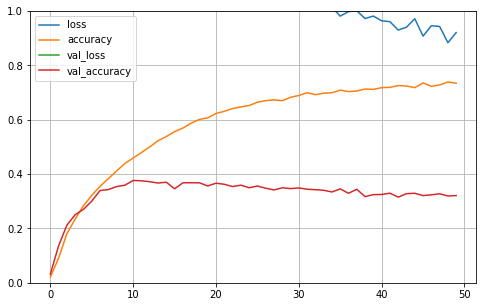

In [7]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

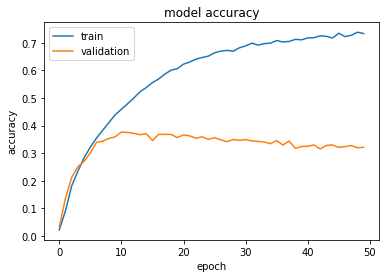

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

# Kiểm tra

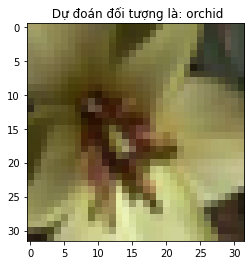

In [10]:
Label = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
test = 5
plt.title(" Dự đoán đối tượng là: " + str(Label[np.argmax(model.predict(x_pre[test].reshape(-1,32,32,3)))]))
plt.imshow(x_pre[test], cmap=plt.get_cmap('gray'))

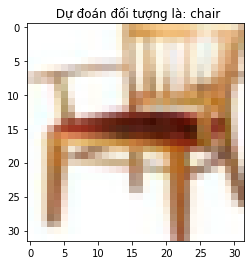

In [14]:
test = 30
plt.title(" Dự đoán đối tượng là: " + str(Label[np.argmax(model.predict(x_pre[test].reshape(-1,32,32,3)))]))
plt.imshow(x_pre[test], cmap=plt.get_cmap('gray'))

In [15]:
model.save('CNN_CIFA100.h5')